# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:
 1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
 2. Write code comments so your code is more readable

Before you start, install the some of the required packages.

### **1.1.** Problem Statement

Text here..

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

# Install kagglehub if not already installed
%pip install kagglehub
import kagglehub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.6/432.6 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rfc3161_client/_rust.abi3.so, 0x0002): Library not loaded: /opt/homebrew/opt/openssl@3/lib/libssl.3.dylib
  Referenced from: <F41168ED-B808-3A06-B95F-1E29CA4A6025> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rfc3161_client/_rust.abi3.so
  Reason: tried: '/opt/homebrew/opt/openssl@3/lib/libssl.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/openssl@3/lib/libssl.3.dylib' (no such file), '/opt/homebrew/opt/openssl@3/lib/libssl.3.dylib' (no such file)

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

In [11]:
# World Bank API URL for GDP per capita (2018-2021)
url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?date=2018:2021&format=json&per_page=10000"

# Fetch data from API
response = requests.get(url)
data = response.json()

# Extract GDP data
gdp_list = []
for entry in data[1]:  # API structure: data[1] contains actual records
    if entry["value"] is not None:  # Ignore missing GDP values
        gdp_list.append({ 
            "Country": entry["country"]["value"],
            "Year": int(entry["date"]),
            "GDP per Capita": entry["value"]
        })

# Convert to DataFrame
gdp_df = pd.DataFrame(gdp_list)

# Save to CSV for later use
gdp_df.to_csv("gdp_per_capita_2018_2021.csv", index=False)

print("GDP Data Scraped Successfully!")
gdp_df.head(5)

GDP Data Scraped Successfully!


,Country,Year,GDP per Capita
0,Africa Eastern and Southern,2021,1522.590088
1,Africa Eastern and Southern,2020,1344.080962
2,Africa Eastern and Southern,2019,1493.780445
3,Africa Eastern and Southern,2018,1538.924188
4,Africa Western and Central,2021,1747.840549


In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         1033 non-null   object 
 1   Year            1033 non-null   int64  
 2   GDP per Capita  1033 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.3+ KB


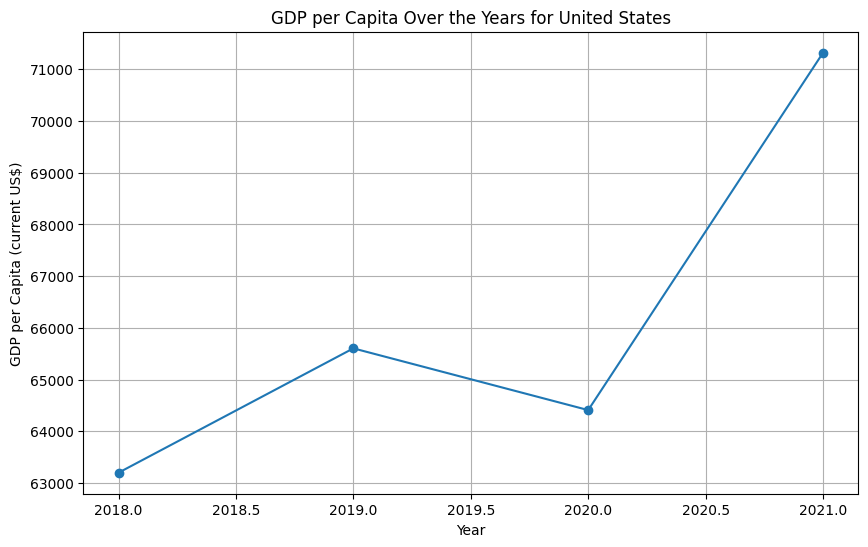

In [13]:
# Filter data for a specific country, e.g., 'United States'
country_data = gdp_df[gdp_df['Country'] == 'United States']

# Plot GDP per Capita over the years
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['GDP per Capita'], marker='o')
plt.title('GDP per Capita Over the Years for United States')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.grid(True)
plt.show()

In [19]:
# Air Quality Index inport data gathering and loading method
AQI = pd.read_csv(kagglehub.dataset_download("ramjasmaurya/most-polluted-cities-and-countries-iqair-index"))

NameError: name 'kagglehub' is not defined

In [16]:
AQI.head()

,Rank,Country/Region,2021,2020,2019,2018,Population
0,1,Bangladesh,76.9,77.1,83.3,97.1,"164,689,383"
1,2,Chad,75.9,-,-,-,"16,425,859"
2,3,Pakistan,66.8,59,65.8,74.3,"220,892,331"
3,4,Tajikistan,59.4,30.9,-,-,"9,537,642"
4,5,India,58.1,51.9,58.1,72.5,"1,380,004,385"


In [17]:
POP = pd.read_csv('POPULATION.csv', index_col=False)

In [18]:
POP.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
